C:\Users\Yu Xuan\AppData\Local\Temp\ipykernel_10012\134650191.py:25: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(str.strip)
C:\Users\Yu Xuan\AppData\Local\Temp\ipykernel_10012\134650191.py:25: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(str.strip)


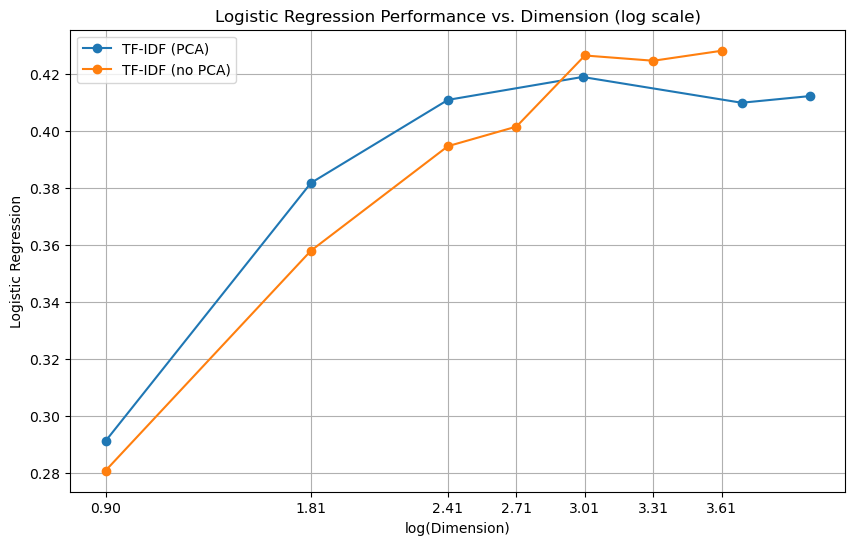

In [5]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Read the contents of the uploaded file
file_path = 'TF-IDF.md'

with open(file_path, 'r', encoding='utf-8') as file:
    file_content = file.read()

# Step 2: Extract the data from the markdown content
def extract_table_data(section_title, content):
    # Locate the section
    section_regex = re.compile(rf'#### {re.escape(section_title)}\n\n(\|.*\n)+')
    match = section_regex.search(content)
    if not match:
        return None
    
    # Extract the table data
    table_data = match.group().split('\n')[2:]  # Skip the header row
    table_data = [row.split('|')[1:-1] for row in table_data if row.strip()]
    df = pd.DataFrame(table_data[1:], columns=table_data[0])
    df.columns = df.columns.str.strip()
    df = df.applymap(str.strip)
    return df

# Extract the two tables
tfidf_pca_df = extract_table_data('TF-IDF(PCA)', file_content)
tfidf_no_pca_df = extract_table_data('TF-IDF(no PCA)', file_content)

# Step 3: Convert columns to numeric
tfidf_pca_df = tfidf_pca_df[1:].apply(pd.to_numeric, errors='ignore')
tfidf_no_pca_df = tfidf_no_pca_df[1:].apply(pd.to_numeric, errors='ignore')

# Step 4: Plotting the data
plt.figure(figsize=(10, 6))

# Plot TF-IDF (PCA)
plt.plot(np.log10(tfidf_pca_df['Dimension']), tfidf_pca_df['Logistic Regression'], marker='o', label='TF-IDF (PCA)')

# Plot TF-IDF (no PCA)
plt.plot(np.log10(tfidf_no_pca_df['Dimension']), tfidf_no_pca_df['Logistic Regression'], marker='o', label='TF-IDF (no PCA)')

# Adding labels and title
plt.xlabel('log(Dimension)')
plt.ylabel('Logistic Regression')
plt.title('Logistic Regression Performance vs. Dimension (log scale)')
plt.legend()

# Format x-axis labels to two decimal places
plt.xticks(ticks=np.log10(tfidf_pca_df['Dimension']), labels=[f'{x:.2f}' for x in np.log10(tfidf_pca_df['Dimension'])])
plt.xticks(ticks=np.log10(tfidf_no_pca_df['Dimension']), labels=[f'{x:.2f}' for x in np.log10(tfidf_no_pca_df['Dimension'])])

# Show the plot
plt.grid(True)
plt.show()
